In [231]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import statistics as st
from scipy import stats

In [11]:
other_train = pd.read_csv("other_train.csv", sep=',', index_col = 0)

In [51]:
other_valid = pd.read_csv("other_valid.csv")

In [166]:
personal_train = pd.read_csv("personal_train.csv",sep=',', index_col = 0)

In [14]:
personal_valid = pd.read_csv("personal_valid.csv")

# DATASET personal_train

In [226]:
personal_train.isna().sum()

name             0
address          0
age              0
sex              0
date_of_birth    0
dtype: int64

Nemusíme si vymazať žiadne záznamy, lebo všetky sú úplné

In [172]:
personal_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 5 columns):
name             3933 non-null object
address          3933 non-null object
age              3933 non-null int64
sex              3933 non-null object
date_of_birth    3933 non-null object
dtypes: int64(1), object(4)
memory usage: 184.4+ KB


# Opis atribútov 
### počet záznamov: 3933
### počet atribútov: 5

* name 
    - meno osoby v datasete
    - type object
* address 
    - adresa osoby v datasete
    - type object
* age 
    - vek osoby v datasete
    - type int64
* sex 
    - pohlavie osoby v datasete
    - type object
* date_of_birth 
    - dátum narodenia osoby v datasete
    - type object

In [235]:
ages = personal_train[(personal_train.age < 130) & (personal_train.age >= 0)]

Odfiltrovanie záznamov kde mali ľudia záznamy veku menej ako 0 alebo viac ako 130 rokov

In [240]:
ages.describe(include = np.number)

,age
count,3539.000000
mean,51.771404
std,11.813298
min,3.000000
25%,44.000000
50%,52.000000
75%,59.000000
max,113.000000


In [238]:
stats.mode(ages['age'])

ModeResult(mode=array([53], dtype=int64), count=array([139]))

In [241]:
personal_train.describe(exclude = np.number)

,name,address,sex,date_of_birth
count,3933,3933,3933,3933
unique,3933,3933,2,3706
top,Joseph Matos,Unit 7739 Box 6743\r\nDPO AP 36241,Male,1963-02-12
freq,1,1,2646,4


In [221]:
personal_train['sex'].unique()

array([' Male', ' Female'], dtype=object)

### Deskriptívne štatistické údaje pre nečíslené atribúty nám vrátili:
* počet unikátnych mien sa zhoduje s celkovým počtom mien z čoho vyplýva že v datasete nie sú jediný menovci
* atribút pohlavia je distribuovaný iba medzi dve hdonoty a to na mužov(M) a ženy(F)
* z 3933 ľudí v datasete až 2646 záznamov patrí mužom
* najčastejší dátum narodenia je 12 februára 1963 a to presne 4 majú narodeniny v rovnaký deň

### Deskriptívne štatistické údaje pre číselné atribúty nám vrátili:

* primerný vek je 51,77 roka
* až 75% záznamov je od ľudí starších ako 44 rokov
* iba 25% záznamov je od ľudí starších ako 59 rokov
* medzikvartilové rozpetie je teda 15 rokov, a z predošlých záznamov nám z toho vyplýva že 50% záznamov je od ľudí približne stredného veku
* vekový rozsah je od 3 po 113 rokov


In [36]:
personal_train.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",39,Male,1979-12-14
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",65,Female,1953-11-21
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",50,Female,1969-03-06
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",47,Male,1972-02-28
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",46,Female,1973-10-05 00 00 00


In [37]:
other_train.describe()

,kurtosis_oxygen,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,mean_oxygen,hours-per-week,capital-loss
count,3962.000000,3972.000000,3971.000000,3567.000000,3965.000000,3975.000000,3968.000000,3969.000000,3.964000e+03,3970.000000,3974.000000,3969.000000,3967.000000,3971.000000
mean,7.428899,10.085851,4.192579,101.327023,31.117496,932.459371,91.430852,0.946330,1.905427e+05,0.254660,45.196785,18.374766,40.666247,88.003274
std,4.817449,2.617172,9.648298,33.521820,22.262023,6403.008032,108.622734,1.605552,1.041594e+05,0.435725,7.613055,34.663280,12.171287,403.844322
min,-2.597872,1.000000,-1.755332,6.187500,7.370432,0.000000,-1.976976,-1.641515,1.941000e+04,0.000000,25.695250,0.213211,1.000000,0.000000
25%,3.667526,9.000000,-0.120195,87.660156,15.024700,0.000000,12.928386,0.071229,1.178878e+05,0.000000,40.199113,2.061873,40.000000,0.000000
50%,7.787156,10.000000,0.372981,110.640625,20.547873,0.000000,68.505049,0.310186,1.807455e+05,0.000000,45.895487,3.237458,40.000000,0.000000
75%,10.278883,13.000000,2.067417,124.277344,43.124802,0.000000,127.057043,0.770947,2.384682e+05,1.000000,50.376893,12.603679,45.000000,0.000000
max,34.539844,16.000000,68.101622,189.734375,110.642211,99999.000000,1191.000837,8.069522,1.268339e+06,1.000000,91.206475,217.371238,99.000000,3900.000000


# problémy
* rozbiť personal_info #DONE
* upraviť dátumy #TODO
* ludia maju divne rokov

# Other_train dataset
* počet záznamov: 3983
* počet atribútov: 20

### Atribúty
1. name 
    * typ object
    * meno pacienta
2. address 
    * typ object
    * adresa pacienta
3. kurtosis_oxygen
    * typ float64 
    * hodnota "tej veci" 
    * priemerná hodnota: 7.4
    * maximálna hodnota: 34.5
    * minimálna hodnota: -2.6
4. ...

In [158]:
def process_pi(text):
    if pd.isnull(text):
        return pd.Series([np.nan]*5)
    splitted_pi = re.split('[| \r\r\n]',text)
    splitted_pi = list(filter(None,splitted_pi))
    splitted_pi.remove("--")
    return pd.Series([splitted_pi[0],splitted_pi[1],splitted_pi[2],splitted_pi[3],splitted_pi[4]])

In [159]:
other_train[['job','state','Family status','Home','Color']] = other_train['personal_info'].apply(process_pi)

In [163]:
other_train

,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,capital-gain,...,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,job,state,Family status,Home,Color
0,Brian Newhall,"52925 Barton Ville Suite 664\r\nEast Whitney, ...",8.289889,f,14.0,Not-in-family,-0.378956,119.445312,17.929757,0.0,...,53.143057,<=50K,2.932274,50.0,0.0,Craft-repair,United-States,Never-married,Private,White
1,Patrick Behne,"037 Long Springs\r\nPort Maria, OH 58969",4.322444,t,6.0,Husband,4.146348,77.085938,43.980061,0.0,...,43.391932,<=50K,10.596154,40.0,0.0,Other-service,United-States,Married-civ-spouse,Private,Black
2,Steven Arnold,"471 Kevin Spurs Suite 564\r\nReneeland, NC 84482",4.702130,f,5.0,Own-child,-0.170853,126.046875,36.950157,0.0,...,50.909365,<=50K,7.939799,40.0,0.0,Machine-op-inspct,United-States,Never-married,Private,White
3,Mark Turner,"459 Parsons Centers\r\nWest Laura, UT 03831",15.348017,f,13.0,Husband,0.219464,109.289062,13.871366,0.0,...,50.772802,>50K,0.950669,40.0,0.0,Prof-specialty,United-States,Married-civ-spouse,Local-gov,White
4,Mike Sams,"3148 Danielle Walk Apt. 320\r\nSaraborough, CA...",1.972958,f,12.0,Husband,18.011655,53.789062,67.752058,7688.0,...,30.062085,>50K,30.670569,50.0,0.0,Sales,United-States,Married-civ-spouse,Private,White
5,Scott Chambliss,USCGC Marquez\r\nFPO AE 35437,5.928902,f,9.0,Wife,-0.318784,110.070312,25.913545,0.0,...,50.985933,<=50K,5.086120,20.0,0.0,Transport-moving,United-States,Married-civ-spouse,??,White
6,Eddy Kessler,7646 Holder Garden Suite 721\r\nPort Christine...,8.914690,f,9.0,Husband,-0.261854,131.101562,16.870114,0.0,...,52.347523,<=50K,2.840301,50.0,0.0,Exec-managerial,United-States,Married-civ-spouse,nan,White
7,David Walters,677 Charles Stravenue Suite 998\r\nFrancisfort...,11.939385,F,10.0,Own-child,-0.271453,120.023438,11.912406,0.0,...,49.763419,<=50K,1.663880,40.0,0.0,Adm-clerical,United-States,Never-married,Private,White
8,Alonzo Ellis,7401 Donaldson Lake Apt. 338\r\nPort Wayneview...,11.756891,f,9.0,Husband,0.594105,97.914062,16.101629,0.0,...,42.030872,<=50K,1.530100,45.0,0.0,Craft-repair,United-States,Married-civ-spouse,Private,White
9,Jose Holmes,"5519 Henry Hollow\r\nLisamouth, MD 56399",1.370528,f,13.0,Not-in-family,38.328764,17.671875,63.742608,0.0,...,29.867706,<=50K,49.280936,50.0,0.0,?,United-States,Married-spouse-absent,?,White


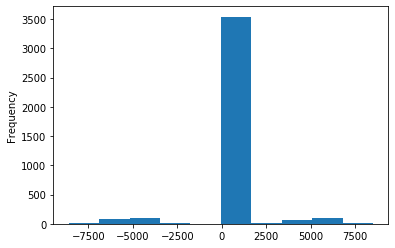

In [52]:
personal_train["age"].plot.hist()

In [53]:
personal_train = personal_train[(personal_train.age < 130) & (personal_train.age >= 0)]

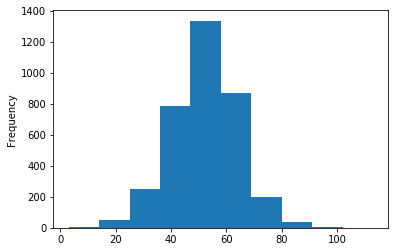

In [57]:
personal_train["age"].plot.hist()

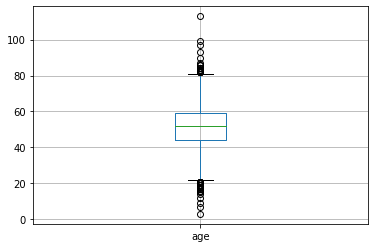

In [55]:
personal_train.boxplot("age")